## 2022 Predict Ideology Score for Select Celebrities

In [2]:
from fastai.text.all import *
import transformers
from ideology_utils import *

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
transformers.utils.logging.set_verbosity(40) 

### Download Unlimited Tweets using Unofficial Twitter API

Twitter handles for a selected **Celebrities** were copied and pasted into a csv `handles_group.csv` file manually from here: https://www.4icu.org/twitter/us/

Used `node index.js handles_group.csv 500`
This should be done in mamba environment containing `npm` and `nodejs`. The program itself is `index.js`. All of this is located in `twitterAPI` and is available from github: https://github.com/colindaniels/twitterAPI

To load these tweeets, reference the directory that then contains `json` files for each member of the group.

In [19]:
group = Path('tweets/tweets-celebs-2022-100')

### Download Tweets using Official Twitter API (faster, but limited to past week and subject to rate limits) 

In [4]:
#group = get_tweets_of_group("handles/handles_nfl.csv", "tweets-nfl")

### Ideology of a Select Group using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

In [5]:
trainer,tokz = load_tfms_model()

In [20]:
scores_tfms = scores_of_group_tfms(group, [trainer,tokz])

['kanyewest', 0.48, 0.45, 100]
['cshirky', 0.42, 0.45, 100]
['jeweljk', 0.25, 0.27, 100]
['taylorswift13', 0.11, 0.16, 100]
['rainnwilson', 0.45, 0.46, 100]
['David_Cameron', 0.29, 0.33, 100]
['ddlovato', 0.18, 0.22, 99]
['blakeshelton', 0.56, 0.54, 100]
['onedirection', 0.33, 0.33, 100]
['masason', 0.09, 0.15, 76]
['wyclef', 0.22, 0.24, 100]
['leeodden', 0.58, 0.59, 100]
['elonmusk', 0.56, 0.54, 100]
['SpeakerBoehner', 0.57, 0.56, 100]
['scoopit', 0.88, 0.74, 100]
['glynmoody', 0.38, 0.44, 100]
['chrisbrogan', 0.35, 0.36, 100]
['Alcatel_Lucent', 0.72, 0.7, 100]
['serenawilliams', 0.25, 0.29, 100]
['richardbranson', 0.33, 0.33, 98]
['globeandmail', 0.59, 0.58, 100]
['andy_murray', 0.4, 0.43, 100]
['klout', 0.76, 0.74, 100]
['neiltyson', 0.44, 0.46, 99]
['mattcutts', 0.3, 0.32, 100]
['davewiner', 0.58, 0.56, 100]
['LennyKravitz', 0.24, 0.31, 100]
['50cent', 0.23, 0.27, 100]
['Scobleizer', 0.45, 0.44, 100]
['britneyspears', 0.18, 0.22, 99]
['adamlambert', 0.26, 0.27, 100]
['rihanna', 0.3

In [21]:
df = scores2df(scores_tfms,'s1')

### Ideology of Select Celebrities using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.
**0 is Progressive, 1 is Conservative**

<AxesSubplot:ylabel='Frequency'>

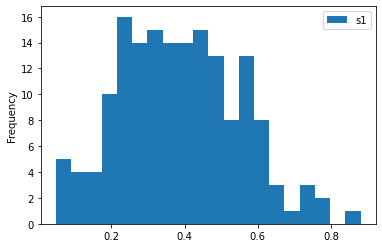

In [23]:
df.plot.hist(y='s1',x='handle',bins=20)

<AxesSubplot:ylabel='handle'>

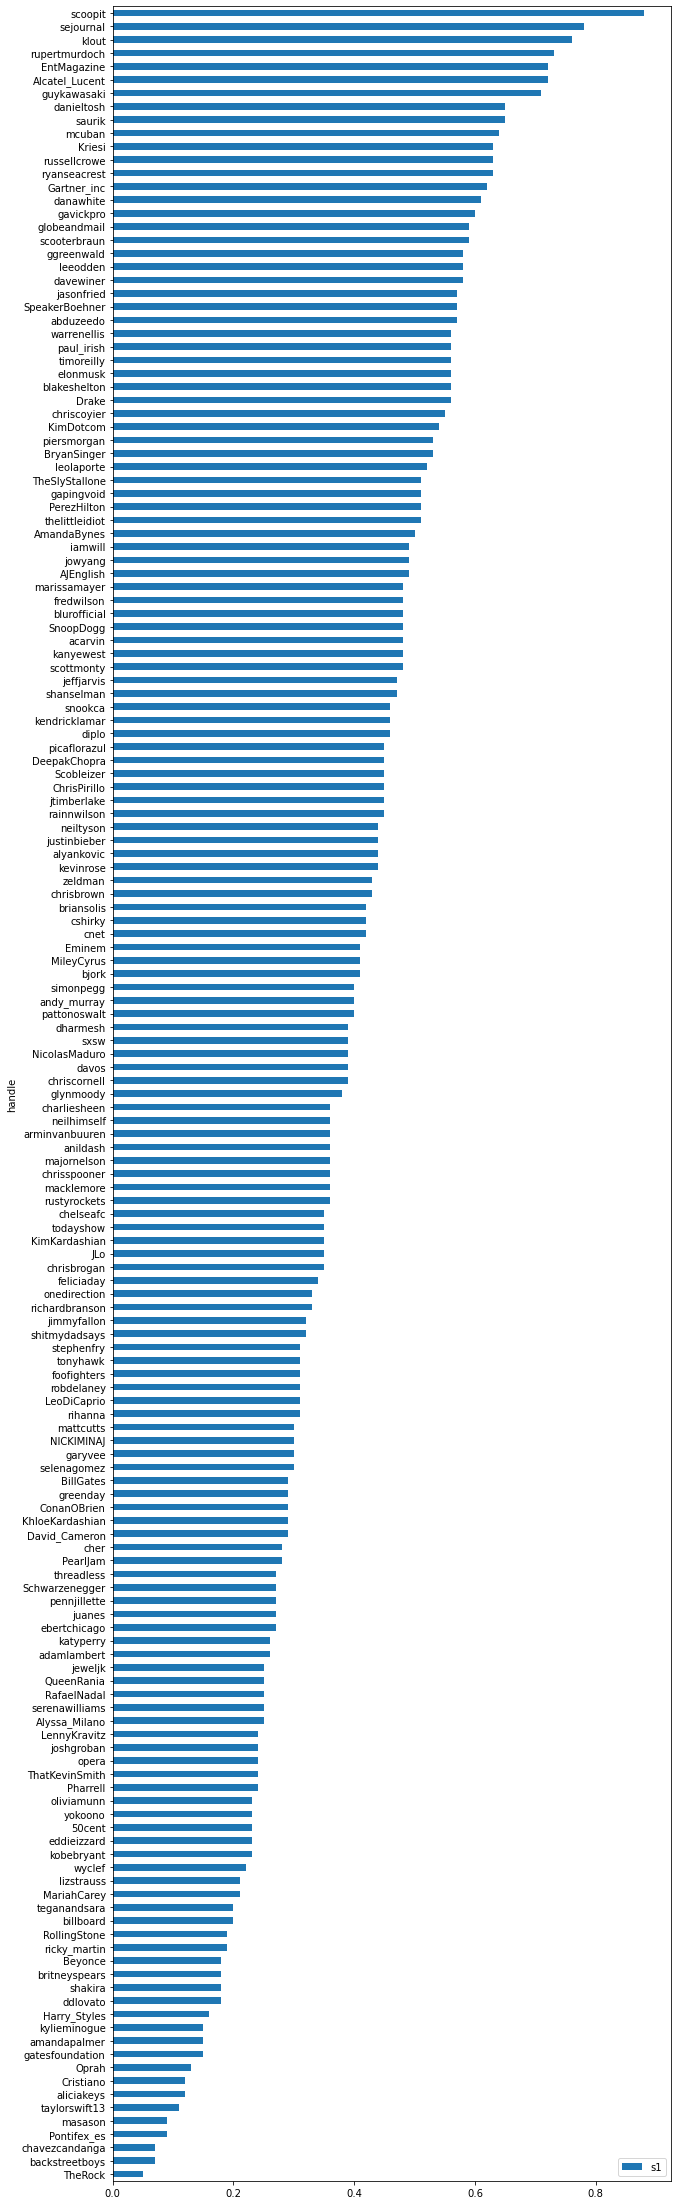

In [24]:
df.plot.barh(y='s1',x='handle',figsize=(10,40),fontsize=10)

In [48]:
pd.set_option('display.max_rows', None)
df[['handle','s1']].sort_values(by='s1',ascending=False)

,handle,s1
14,scoopit,0.88
54,sejournal,0.78
22,klout,0.76
107,rupertmurdoch,0.73
146,EntMagazine,0.72
17,Alcatel_Lucent,0.72
63,guykawasaki,0.71
81,saurik,0.65
105,danieltosh,0.65
153,mcuban,0.64
